#### Home 1:
Create a class called 'four_wheeler' which has:

a class attribute: 'number_of_tyres' initialized to a value of 4.
three instance attributes: 'manufacturer', 'model' and 'color'.
an instance method which prints the details about the car based on the three instance attribute and the class attribute.

Create an instance of the above class with the following attributes:

'manufacturer': 'BMW'
'model': 5 series
'color': Blue

In [1]:
class four_wheeler:
    number_of_tyres =4 # A class attribute
    
    def __init__(self , manufacturer , model , color):
        self.manufacturer = manufacturer
        self.model = model
        self.color = color

In [3]:
car = four_wheeler('BMW' , '5 series' , 'Blue')

In [5]:
car.number_of_tyres

4

In [6]:
car.model()

TypeError: 'str' object is not callable

In [7]:
car.model


'5 series'

In [8]:
car.color

'Blue'

In [9]:
car.manufacturer

'BMW'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import pyfolio as pf

C:\Users\ROHIT\opencv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


#### HomeWork 2
Implement the other strategies you have learnt in OOP format, for e.g.,
* the Big Moves Monday strategy
* Bollinger bands strategy
* MACD strategy

In [48]:
class backtesting_MACD:
    
    def __init__(self , ticker , start_date , end_date ,s_dema , l_dema , signal_dema ):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.s_dema = s_dema
        self.l_dema = l_dema
        self.signal_dema = signal_dema
        
        # now call the basic method on the __init__ cocnstructor
        self.fetch_data()
        self.indicators()
#         self.signals()
        self.positions()
        self.returns()
        
    def fetch_data(self):
        self.df = yf.download(self.ticker , self.start_date , self.end_date)
        
    def indicators(self):
        self.df['ema_26'] = self.df['Adj Close'].ewm(span = self.l_dema, adjust = False).mean()
        self.df['ema_12'] = self.df['Adj Close'].ewm(span = self.s_dema, adjust = False).mean()
        self.df['MACD'] = self.df['ema_12'] - self.df['ema_26']
        self.df['signal'] = self.df['MACD'].ewm(span = self.signal_dema , adjust = False).mean()
     
    def positions(self):
        self.df['position'] = np.where(self.df['MACD']> self.df['signal'],1, -1)
        self.df['position'] = self.df['position'].shift(1)
    
    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close']/ self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns']*self.df['position']
        
        print('Total return:' , np.exp(self.df['strategy_returns'].cumsum()[-1])-1)
        return self.df['strategy_returns'].cumsum()[-1]
    def analysis(self):
        self.df[['MACD' , 'signal' , 'position', 'Adj Close']].plot(figsize = (15,6), secondary_y = 'position' , grid = True)
        plt.title('Buy and Hold Vs Crossover Strategy Cumulative Returns')
        
        pf.create_simple_tear_sheet(self.df['strategy_returns'])

In [56]:
end1 = dt.datetime(2021, 12, 1).date()
start1 = dt.datetime(2019, 1, 2).date()


In [57]:
irctc_MACD = backtesting_MACD('IRCTC.NS' , start1 , end1 , 12, 26 , 9)

[*********************100%***********************]  1 of 1 completed
Total return: 1.621880962653142


Start date,2019-10-14
End date,2021-11-30
Total months,25
,Backtest
Annual return,39.2%
Cumulative returns,100.6%
Annual volatility,50.5%
Sharpe ratio,0.91
Calmar ratio,0.63
Stability,0.07
Max drawdown,-62.7%


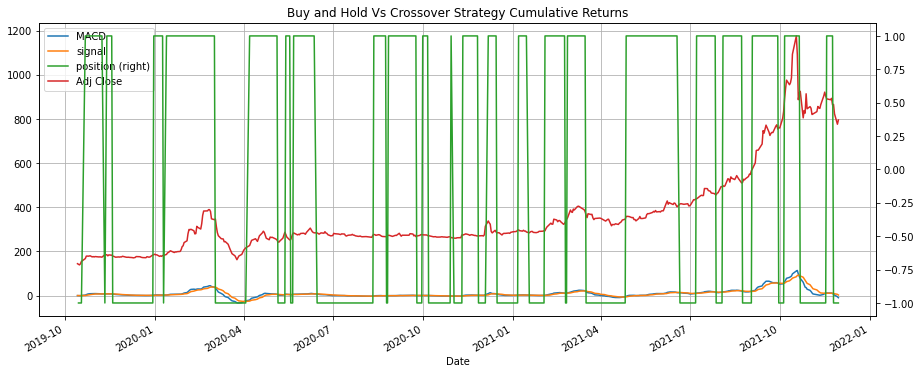

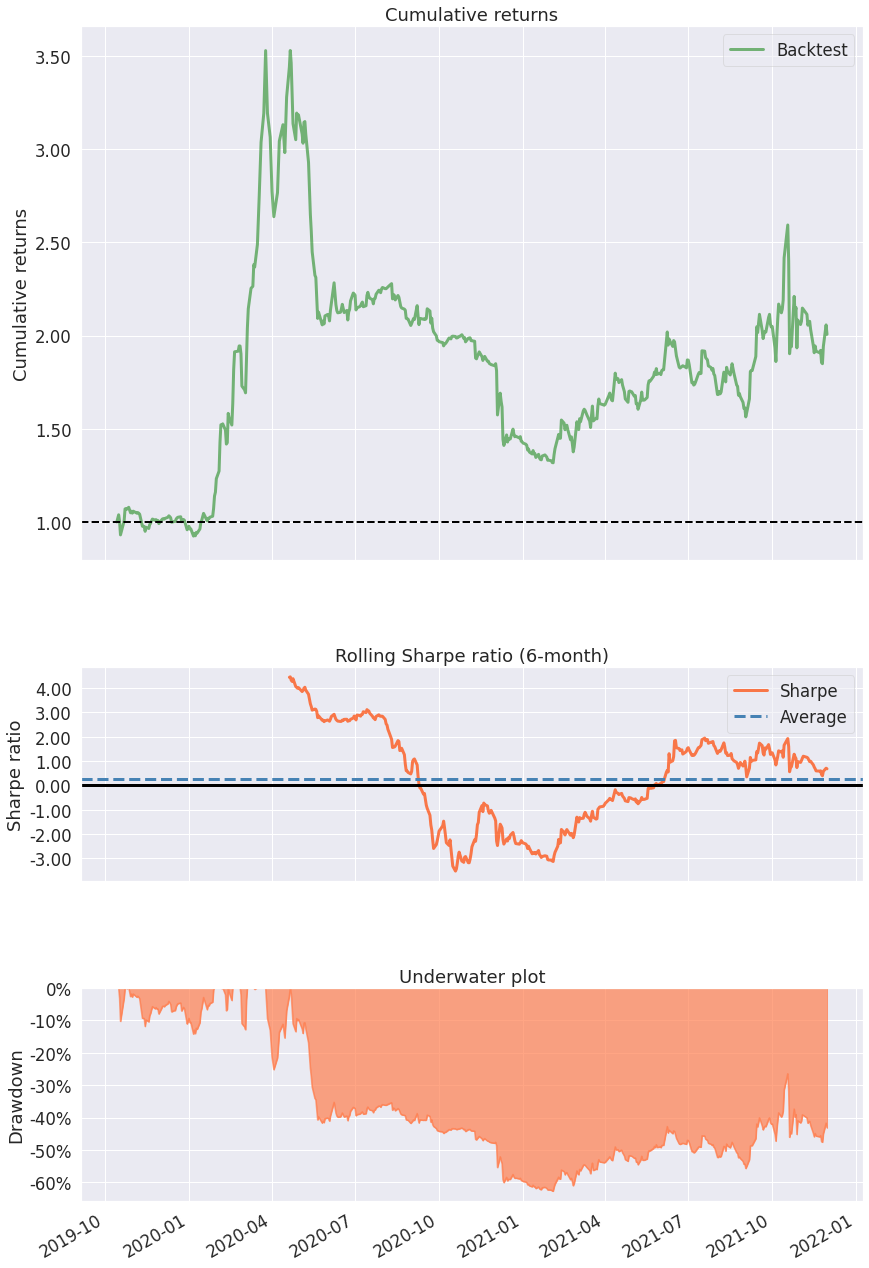

In [58]:
irctc_MACD.analysis()

In [59]:
stock_list = ['ULTRACEMCO.NS',
'TATACONSUM.NS',
'LT.NS',
'NESTLEIND.NS',
'KOTAKBANK.NS',
'RELIANCE.NS',
'MARUTI.NS',
'ICICIBANK.NS',
'CIPLA.NS',
'SHREECEM.NS',
'NTPC.NS',
'HEROMOTOCO.NS',
'TITAN.NS',
'BRITANNIA.NS',
'ONGC.NS',
'INDUSINDBK.NS',
'BHARTIARTL.NS',
'ITC.NS',
'HDFCLIFE.NS',
'HINDALCO.NS',
'TCS.NS',
'WIPRO.NS',
'BAJFINANCE.NS',
'BAJAJFINSV.NS',
'COALINDIA.NS',
'BAJAJ-AUTO.NS',
'GRASIM.NS',
'TATASTEEL.NS',
'MM.NS',
'TECHM.NS']

In [60]:
stock_name=[]
net_return =[]

for stock in stock_list:
    print('Backtesting _MACD_26_12_9' , stock)
    a = backtesting_MACD(stock, start1 , end1 , 12, 26, 9)
    stock_name.append(stock)
    net_return.append(a.returns())

Backtesting _MACD_26_12_9 ULTRACEMCO.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.059484961660357216
Total return: 0.059484961660357216
Backtesting _MACD_26_12_9 TATACONSUM.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.7066993358446292
Total return: 0.7066993358446292
Backtesting _MACD_26_12_9 LT.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.9711344602853775
Total return: 0.9711344602853775
Backtesting _MACD_26_12_9 NESTLEIND.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.06663898479916308
Total return: -0.06663898479916308
Backtesting _MACD_26_12_9 KOTAKBANK.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.579546392622224
Total return: -0.579546392622224
Backtesting _MACD_26_12_9 RELIANCE.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.5514

IndexError: index -1 is out of bounds for axis 0 with size 0

In [62]:
results = pd.DataFrame({'stock': stock_name, 'Net Returns':net_return})

results.sort_values(by = 'Net Returns' , ascending = False)

,stock,Net Returns
14,ONGC.NS,1.622565
15,INDUSINDBK.NS,1.515988
27,TATASTEEL.NS,1.251188
10,NTPC.NS,1.217157
22,BAJFINANCE.NS,0.852394
19,HINDALCO.NS,0.851510
2,LT.NS,0.678609
23,BAJAJFINSV.NS,0.672306
20,TCS.NS,0.628499
24,COALINDIA.NS,0.608863
